In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
dimension_df = pd.read_csv('EvaluationData/DimensionData.csv', sep=",")
dimension_df

,Iteration,Dimension,DE,PSO,RS
0,0,5.0,-1.034063e+05,-1.168129e+05,-1.729504e+05
1,0,10.0,-2.426999e+05,-3.073732e+05,-7.161680e+05
2,0,15.0,-3.587482e+06,-6.027284e+05,-3.577498e+06
3,0,20.0,-6.437604e+06,-1.248328e+06,-6.437604e+06
4,1,5.0,-1.022497e+05,-1.167537e+05,-1.538717e+05
...,...,...,...,...,...
75,18,20.0,-6.437604e+06,-4.607159e+06,-6.437239e+06
76,19,5.0,-1.022497e+05,-1.224762e+05,-1.422706e+05
77,19,10.0,-2.359943e+05,-2.458015e+05,-4.282240e+05
78,19,15.0,-4.350106e+05,-5.228630e+05,-3.524013e+06


In [3]:
model_list = ["DE", "PSO", "RS"]

In [4]:
mean = {}
std = {}
restults_df = dimension_df[["DE", "PSO", "RS"]]
for d in dimension_df["Dimension"].unique():
    mean[d] = restults_df[dimension_df["Dimension"]==d].to_numpy().flatten().mean()
    std[d] = restults_df[dimension_df["Dimension"]==d].to_numpy().flatten().std()


In [5]:
mean

{5.0: -126846.99970200445,
 10.0: -375415.8393146871,
 15.0: -1675845.5206580865,
 20.0: -5792867.513741386}

In [6]:
std

{5.0: 29496.652714317395,
 10.0: 175551.06743982865,
 15.0: 1399258.1590646615,
 20.0: 1654218.9252847086}

In [7]:
for dim, mean_ in mean.items():
    std_ = std[dim]
    restults_df[dimension_df["Dimension"]==dim] = (restults_df[dimension_df["Dimension"]==dim] - mean_)/std_

C:\Users\Pascal\AppData\Local\Temp\ipykernel_11100\4283755150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restults_df[dimension_df["Dimension"]==dim] = (restults_df[dimension_df["Dimension"]==dim] - mean_)/std_
C:\Users\Pascal\AppData\Local\Temp\ipykernel_11100\4283755150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restults_df[dimension_df["Dimension"]==dim] = (restults_df[dimension_df["Dimension"]==dim] - mean_)/std_


In [8]:
restults_df

,DE,PSO,RS
0,0.794691,0.340178,-1.563003
1,0.755996,0.387594,-1.941043
2,-1.366179,0.766919,-1.359044
3,-0.389753,2.747242,-0.389753
4,0.833900,0.342184,-0.916194
...,...,...,...
75,-0.389753,0.716778,-0.389532
76,0.833900,0.148180,-0.522892
77,0.794193,0.738329,-0.300814
78,0.886781,0.823996,-1.320820


Text(0.5, 1.0, 'Finale Auswertung')

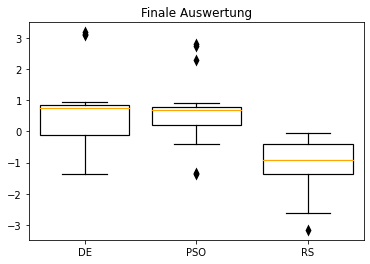

In [9]:
PROPS = {'boxprops':{'facecolor': "white", 'edgecolor':'black'},
'medianprops':{'color':'orange'},
'whiskerprops':{'color':'black'},
'capprops':{'color':'black'}
}
sns.boxplot(data=restults_df, color="white", linewidth=1.2, flierprops = dict(markerfacecolor='black', markersize=8,
                  markeredgecolor='none'), **PROPS)

plt.title("Finale Auswertung")
    

# Timos Data

In [10]:
groundtruth_results_df = pd.read_csv('EvaluationData/GroundtruthData.csv', sep=";", decimal=",", thousands=".")
groundtruth_results_df

,Iteration,Groundtruth,DE,PSO,RS
0,0,f(x)=e^x+sin(2.5 x^2-3),-920.990092,-921.044710,-945.334746
1,0,Three Hump,-97.273693,-97.273920,-122.616551
2,0,"f(x_1,x_2)=3sin(0.5+0.25x_2x_1)*cos(x_1)",-137.776961,-123.819726,-129.285508
3,1,f(x)=e^x+sin(2.5 x^2-3),-920.990092,-920.990582,-923.878854
4,1,Three Hump,-97.273693,-97.273733,-102.617589
5,1,"f(x_1,x_2)=3sin(0.5+0.25x_2x_1)*cos(x_1)",-137.776838,-123.826537,-124.660285
6,2,f(x)=e^x+sin(2.5 x^2-3),-920.990092,-920.990226,-959.430454
7,2,Three Hump,-97.273694,-97.273758,-125.669217
8,2,"f(x_1,x_2)=3sin(0.5+0.25x_2x_1)*cos(x_1)",-123.819705,-123.819840,-126.724934
9,3,f(x)=e^x+sin(2.5 x^2-3),-920.990092,-920.997128,-977.120156


In [11]:
for g in groundtruth_results_df["Groundtruth"].unique():
    print(g)

f(x)=e^x+sin(2.5 x^2-3)
Three Hump
f(x_1,x_2)=3sin(0.5+0.25x_2x_1)*cos(x_1)


In [12]:
results_g_df = groundtruth_results_df[["DE", "PSO", "RS"]]
results_g_df[groundtruth_results_df["Groundtruth"]==g].to_numpy().flatten()

array([-137.776961, -123.819726, -129.285508, -137.776838, -123.826537,
       -124.660285, -123.819705, -123.81984 , -126.724934, -137.776851,
       -123.819718, -124.976906, -137.776826, -123.820713, -126.015955,
       -123.819705, -123.835323, -127.791376, -137.776824, -123.819733,
       -127.125626, -123.819705, -123.819709, -125.316093, -137.776824,
       -137.776833, -126.070287, -137.776824, -123.819709, -129.394174,
       -137.776824, -123.819839, -123.879642, -123.819705, -123.819721,
       -124.477985, -137.776824, -123.819722, -127.305786, -123.819705,
       -123.819709, -131.727002, -137.776824, -137.776828, -126.827194,
       -137.776824, -123.819849, -125.100093, -123.819705, -123.819802,
       -124.062395, -123.819705, -123.819929, -127.226072, -137.776824,
       -123.819723, -126.105072, -137.776824, -123.819718, -124.184749])

In [13]:
mean = {}
std = {}
for g in groundtruth_results_df["Groundtruth"].unique():
    mean[g] = results_g_df[groundtruth_results_df["Groundtruth"]==g].to_numpy().flatten().astype(np.float64).mean()
    std[g] = results_g_df[groundtruth_results_df["Groundtruth"]==g].to_numpy().flatten().astype(np.float64).std()

In [14]:
for dim, mean_ in mean.items():
    std_ = std[dim]
    results_g_df[groundtruth_results_df["Groundtruth"]==dim] = (results_g_df[groundtruth_results_df["Groundtruth"]==dim] - mean_)/std_

C:\Users\Pascal\AppData\Local\Temp\ipykernel_11100\2996260753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_g_df[groundtruth_results_df["Groundtruth"]==dim] = (results_g_df[groundtruth_results_df["Groundtruth"]==dim] - mean_)/std_
C:\Users\Pascal\AppData\Local\Temp\ipykernel_11100\2996260753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_g_df[groundtruth_results_df["Groundtruth"]==dim] = (results_g_df[groundtruth_results_df["Groundtruth"]==dim] - mean_)/std_


Text(0.5, 1.0, 'Finale Auswertung')

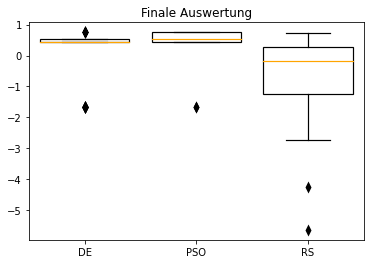

In [15]:
PROPS = {'boxprops':{'facecolor': "white", 'edgecolor':'black'},
'medianprops':{'color':'orange'},
'whiskerprops':{'color':'black'},
'capprops':{'color':'black'}
}
sns.boxplot(data=results_g_df, color="white", linewidth=1.2, flierprops = dict(markerfacecolor='black', markersize=8,
                  markeredgecolor='none'), **PROPS)

plt.title("Finale Auswertung")
    

# Toms Data

In [16]:
datapoint_df = pd.read_csv('EvaluationData/DatapointsData.csv', sep=",")
datapoint_df

,Unnamed: 0,DE,RS,PSO,n
0,0,-5316.674214,-5329.425247,-5315.411699,10
1,1,-5315.400923,-5634.163704,-5315.439652,10
2,2,-6532.727249,-5598.554030,-5315.401075,10
3,3,-5315.400923,-6144.195616,-5315.408910,10
4,4,-5315.400924,-5781.926018,-5315.414185,10
...,...,...,...,...,...
75,75,-49518.273882,-76107.475519,-49514.245467,500
76,76,-49524.176542,-65515.456792,-49514.156373,500
77,77,-49520.221614,-89528.836574,-49514.309900,500
78,78,-49515.862879,-49887.616010,-49514.267387,500


In [17]:
mean = {}
std = {}
datapoint_df_results = datapoint_df[["DE", "PSO", "RS"]]
for d in datapoint_df["n"].unique():
    mean[d] = datapoint_df_results[datapoint_df["n"]==d].to_numpy().flatten().mean()
    std[d] = datapoint_df_results[datapoint_df["n"]==d].to_numpy().flatten().std()


In [18]:
for dim, mean_ in mean.items():
    std_ = std[dim]
    datapoint_df_results[datapoint_df["n"]==dim] = (datapoint_df_results[datapoint_df["n"]==dim] - mean_)/std_

C:\Users\Pascal\AppData\Local\Temp\ipykernel_11100\708972128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datapoint_df_results[datapoint_df["n"]==dim] = (datapoint_df_results[datapoint_df["n"]==dim] - mean_)/std_
C:\Users\Pascal\AppData\Local\Temp\ipykernel_11100\708972128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datapoint_df_results[datapoint_df["n"]==dim] = (datapoint_df_results[datapoint_df["n"]==dim] - mean_)/std_


Text(0.5, 1.0, 'Finale Auswertung')

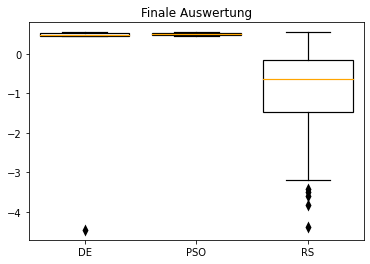

In [19]:
PROPS = {'boxprops':{'facecolor': "white", 'edgecolor':'black'},
'medianprops':{'color':'orange'},
'whiskerprops':{'color':'black'},
'capprops':{'color':'black'}
}
sns.boxplot(data=datapoint_df_results, color="white", linewidth=1.2, flierprops = dict(markerfacecolor='black', markersize=8,
                  markeredgecolor='none'), **PROPS)

plt.title("Finale Auswertung")

# Hillebrands Data

In [20]:
noise_df = pd.read_csv('EvaluationData/NoiseData.csv', sep=",")
noise_df

,Unnamed: 0,noise scale,PSO,RS,DE
0,0,1.0,-34616.952879,-43460.232650,-34611.012889
1,1,1.0,-34611.141803,-34837.489700,-34612.974428
2,2,1.0,-34611.467324,-37487.054003,-34611.012889
3,3,1.0,-34611.026030,-37802.859931,-34611.012889
4,4,1.0,-34611.044641,-42079.251748,-34611.012889
5,5,1.0,-34611.436240,-41935.578641,-34611.012889
6,6,1.0,-34611.028137,-41438.685549,-34611.012889
7,7,1.0,-55155.847525,-44238.592447,-34611.012889
8,8,1.0,-34611.064246,-44025.233522,-34611.012889
9,9,1.0,-34611.047554,-36346.711984,-34611.012889


In [21]:
mean = {}
std = {}
noise_df_results = noise_df[["RS", "PSO", "DE"]]
for d in noise_df["noise scale"].unique():
    mean[d] = noise_df_results[noise_df["noise scale"]==d].to_numpy().flatten().mean()
    std[d] = noise_df_results[noise_df["noise scale"]==d].to_numpy().flatten().std()

In [22]:
for dim, mean_ in mean.items():
    std_ = std[dim]
    noise_df_results[noise_df["noise scale"]==dim] = (noise_df_results[noise_df["noise scale"]==dim] - mean_)/std_

C:\Users\Pascal\AppData\Local\Temp\ipykernel_11100\992105181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_df_results[noise_df["noise scale"]==dim] = (noise_df_results[noise_df["noise scale"]==dim] - mean_)/std_
C:\Users\Pascal\AppData\Local\Temp\ipykernel_11100\992105181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_df_results[noise_df["noise scale"]==dim] = (noise_df_results[noise_df["noise scale"]==dim] - mean_)/std_


Text(0.5, 1.0, 'Finale Auswertung')

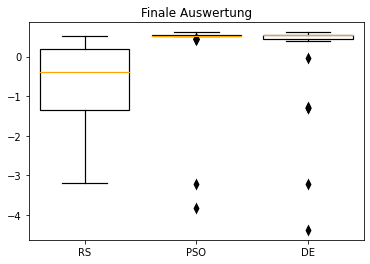

In [23]:
PROPS = {'boxprops':{'facecolor': "white", 'edgecolor':'black'},
'medianprops':{'color':'orange'},
'whiskerprops':{'color':'black'},
'capprops':{'color':'black'}
}
sns.boxplot(data=noise_df_results, color="white", linewidth=1.2, flierprops = dict(markerfacecolor='black', markersize=8,
                  markeredgecolor='none'), **PROPS)

plt.title("Finale Auswertung")

# All Data

In [24]:
final_2_data = pd.concat([noise_df_results, datapoint_df_results, results_g_df])
final_2_data

,RS,PSO,DE
0,-1.335729,0.555426,0.556696
1,0.508264,0.556669,0.556277
2,-0.058352,0.556599,0.556696
3,-0.125887,0.556693,0.556696
4,-1.040403,0.556689,0.556696
...,...,...,...
55,0.107084,0.440286,0.440353
56,0.358523,0.754591,-1.664282
57,-2.074461,0.541931,0.542063
58,0.428184,0.440350,0.440353


Text(0.5, 1.0, 'Finale Auswertung')

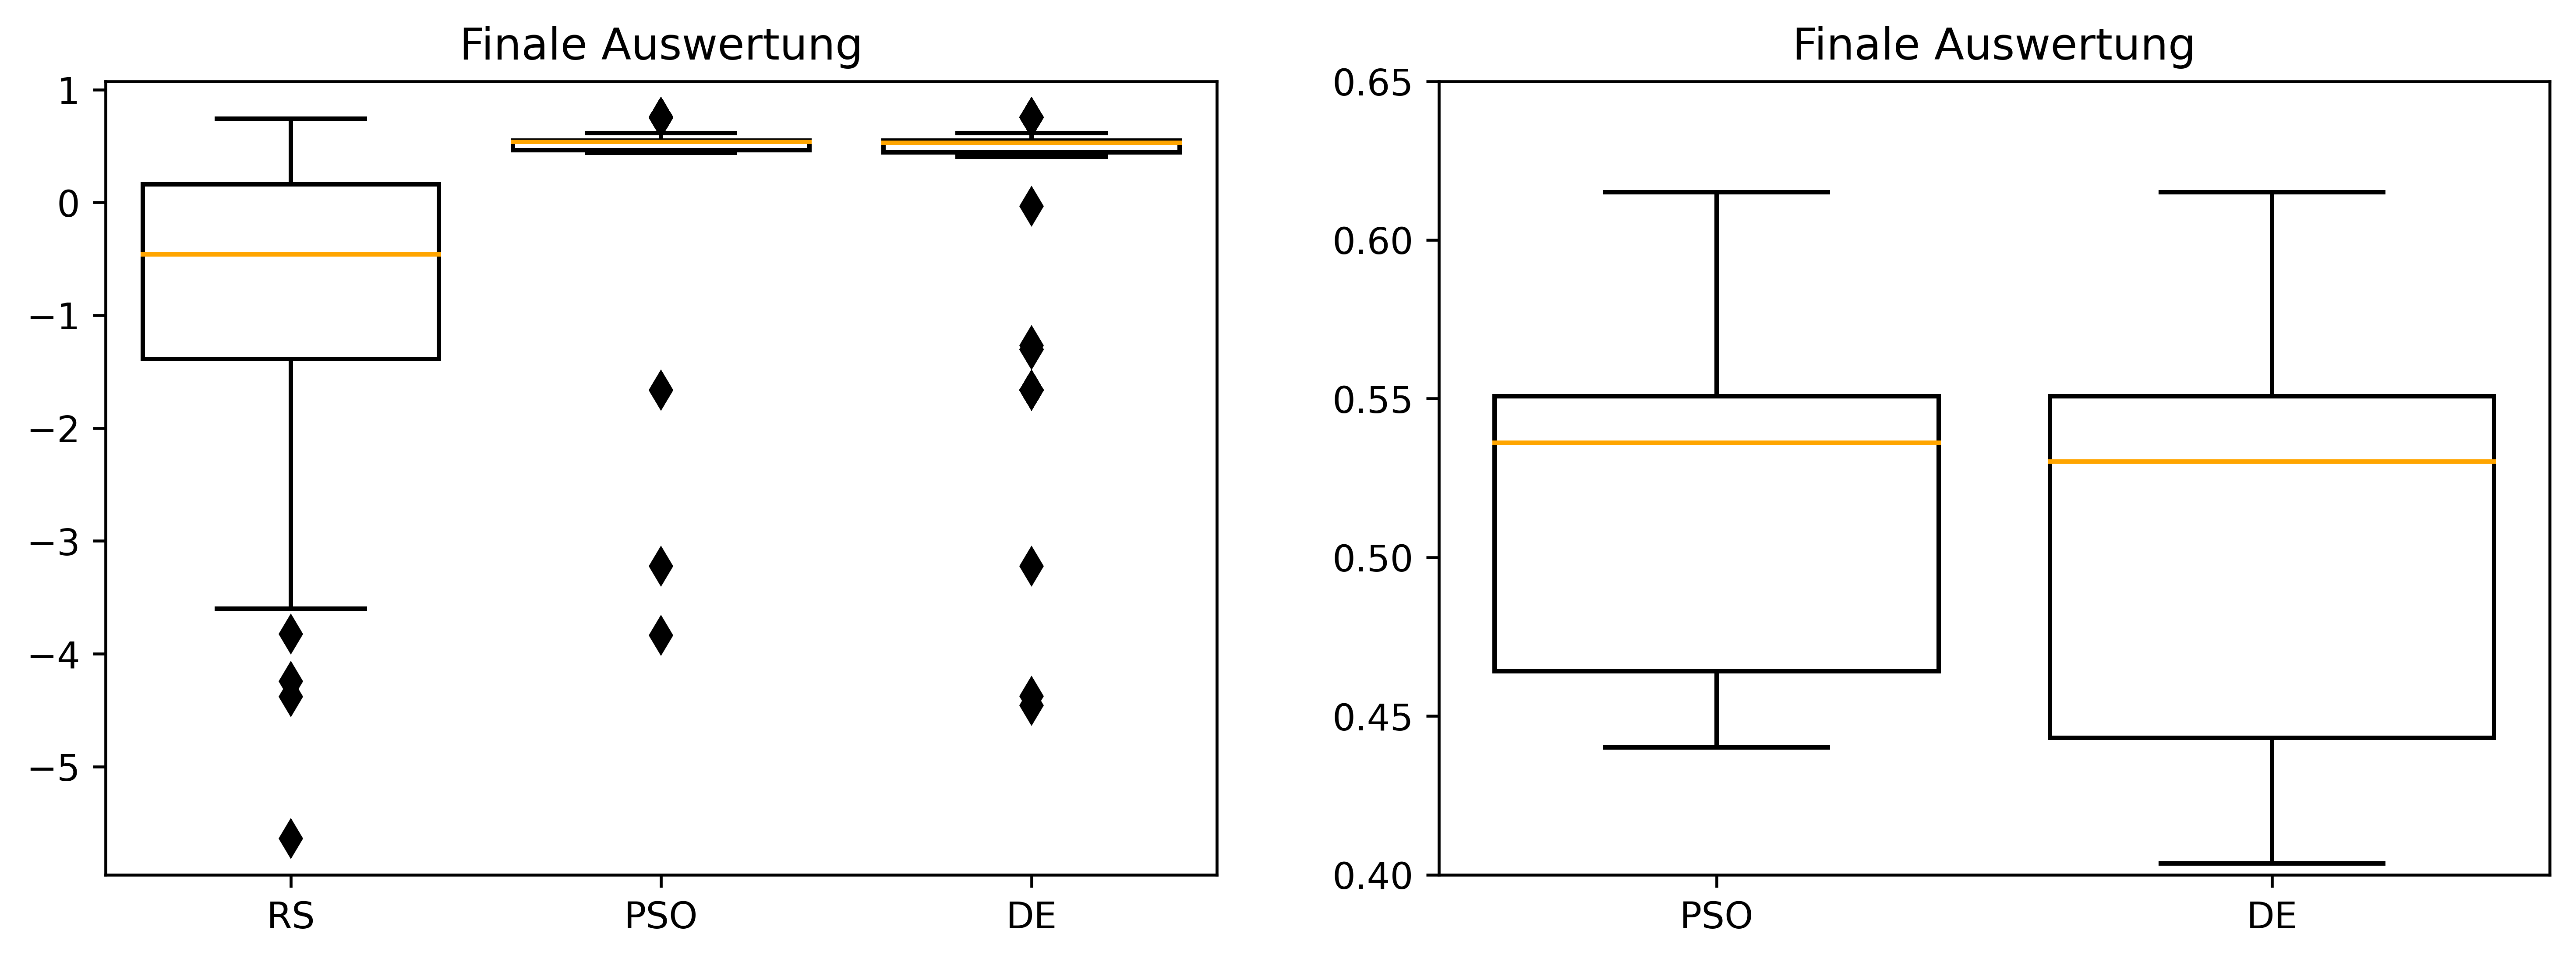

In [27]:
PROPS = {'boxprops':{'facecolor': "white", 'edgecolor':'black'},
'medianprops':{'color':'orange'},
'whiskerprops':{'color':'black'},
'capprops':{'color':'black'}
}

plt.figure(figsize=(12,4), dpi=600)
plt.subplot(121)
sns.boxplot(data=final_2_data, color="white", linewidth=1.2, flierprops = dict(markerfacecolor='black', markersize=8,
                  markeredgecolor='none'), **PROPS)

plt.title("Finale Auswertung")

plt.subplot(122)
final_3_df = final_2_data[["PSO", "DE"]]
sns.boxplot(data=final_3_df, color="white", linewidth=1.2, flierprops = dict(markerfacecolor='black', markersize=8,
                  markeredgecolor='none'), **PROPS)
plt.ylim((0.4, 0.65))
plt.title("Finale Auswertung")

Text(0.5, 1.0, 'Finale Auswertung')

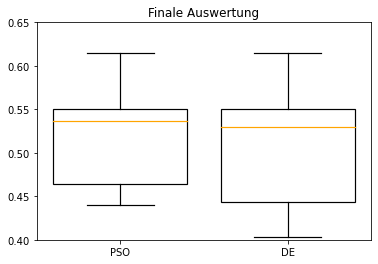

In [28]:
final_3_df = final_2_data[["PSO", "DE"]]

PROPS = {'boxprops':{'facecolor': "white", 'edgecolor':'black'},
'medianprops':{'color':'orange'},
'whiskerprops':{'color':'black'},
'capprops':{'color':'black'}
}
sns.boxplot(data=final_3_df, color="white", linewidth=1.2, flierprops = dict(markerfacecolor='black', markersize=8,
                  markeredgecolor='none'), **PROPS)
plt.ylim((0.4, 0.65))

plt.title("Finale Auswertung")